<a href="https://colab.research.google.com/github/davidwhogg/FlexibleLinearModels/blob/main/ipynb/inv_solve_lstsq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing `inv(A) @ b` with `solve(A, b)` with `lstsq(A, b)`

**David W Hogg** (Flatiron) (NYU) (MPIA)

Check this shit out. Should we be using `lstsq()`?

In addition, on the face of it, these results appear to conflict with the abstract of https://arxiv.org/abs/1201.6035. I have not yet actually read that paper, so I don't know whether there is any *real* conflict.

In [ ]:
import numpy as np
import pylab as plt
np.random.seed(17)
%matplotlib inline

In [ ]:
# make a challenging matrix
n = 32
m = n
foo = np.random.normal(size=(n, m))
A = foo @ foo.T
u, s, v = np.linalg.svd(A)
A = u * s ** 6 @ v
print(np.linalg.cond(A))

1.003674266572795e+18


Text(0.5, 0, 'component')

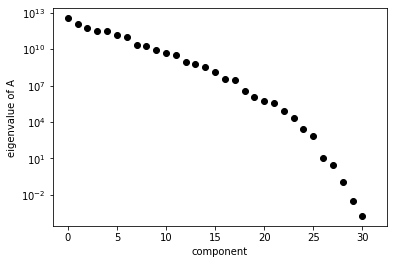

In [ ]:
plt.plot(np.linalg.eigvalsh(A)[::-1], "ko")
plt.semilogy()
plt.ylabel("eigenvalue of A")
plt.xlabel("component")

In [ ]:
# make data and truth; nothing adversarial here.
truth = np.random.normal(size=n)
b = A @ truth
print(b.shape)

(32,)


In [ ]:
# Here is the main result of this notebook
x1 = np.linalg.inv(A) @ b
print("inv, dot:", np.linalg.norm(x1 - truth))
x2 = np.linalg.solve(A, b)
print("solve:", np.linalg.norm(x2 - truth))
x3 = np.linalg.lstsq(A, b, rcond=None)[0]
print("lstsq:", np.linalg.norm(x3 - truth))

inv, dot: 132.43281995593006
solve: 21.672818747182383
lstsq: 2.866459023213573


In [ ]:
x4 = np.linalg.lstsq(A, b, rcond=1e-12)[0]
print("lstsq with non-trivial RCOND:", np.linalg.norm(x4 - truth))

lstsq with non-trivial RCOND: 2.927557322422424


In [ ]:
# Holy fuck check this out!
x5 = np.linalg.lstsq(A, b, rcond=1.)[0]
print("lstsq with absolutely absurdly dumb RCOND=1:", np.linalg.norm(x5 - truth))

lstsq with absolutely absurdly dumb RCOND=1: 2.4505326558280673
